In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc
import seaborn as sns
from scipy.sparse import csr_matrix
import random
random.seed(2021)

/home-2/jpopp4@jhu.edu/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
sc.settings.figdir = "../figs/"

In [18]:
adata = sc.read_h5ad('../data/harmony.batchind.h5ad')

Which cell types are present?

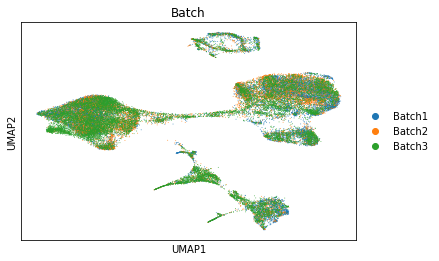

In [9]:
sc.pl.umap(adata, color=['Batch'], save="_batch.png")

In [19]:
adata.obs['Individual'] = [s[6:] for s in adata.obs['individual']]

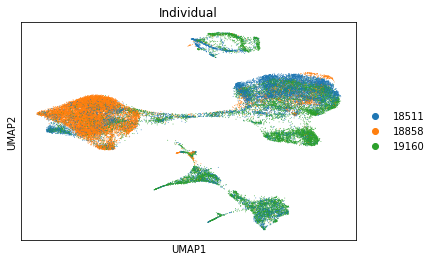

In [21]:
sc.pl.umap(adata, color=['Individual'], save="_individual.png")

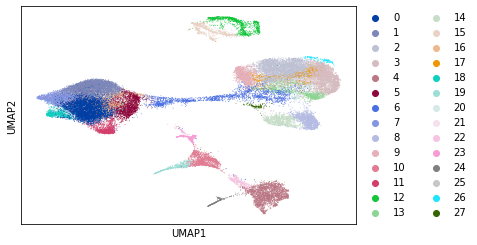

In [26]:
adata.obs['SCT_snn_res.1'] = pd.Categorical(adata.obs['SCT_snn_res.1'])
sc.pl.umap(adata, color=['SCT_snn_res.1'], title="", save="_clusters_res1.png")

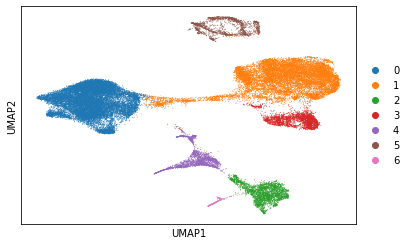

In [27]:
adata.obs['SCT_snn_res.0.1'] = pd.Categorical(adata.obs['SCT_snn_res.0.1'])
sc.pl.umap(adata, color=['SCT_snn_res.0.1'], title="", save="_clusters_res0.1.png")

In [28]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=100, use_rep="X_harmony")
sc.tl.paga(adata, groups='SCT_snn_res.0.1')

In [59]:
def clust2type(c):
    if c == 0:
        return("Pluripotent Cells")
    elif c == 1:
        return("Early Ectoderm")
    elif c == 2:
        return("Mesoderm")
    elif c == 3:
        return("Neural Crest")
    elif c == 4:
        return("Hepatocytes")
    elif c == 5:
        return("Neurons")
    elif c == 6:
        return("Endothelial Cells")
adata.obs['type'] = [clust2type(s) for s in adata.obs['SCT_snn_res.0.1']]

In [62]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,individual,EmptyDrops.Total,EmptyDrops.LogProb,EmptyDrops.Pvalue,EmptyDrops.Limited,EmptyDrops.FDR,EmptyDrops.knee,...,percent.rp,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,seurat_clusters,SCT_snn_res.1,SCT_snn_res.0.5,SCT_snn_res.0.1,Individual,type
Batch1_Lane1_AAACCCAGTATCAGGG,human,4394.0,1935,SNG-NA18858,4394,-6116.937909,0.000100,1,0.0,4370.0,...,23.486573,9958.0,2273,21,1,26,13,1,18858,Early Ectoderm
Batch1_Lane1_AAACCCATCGGAATGG,human,14661.0,3857,SNG-NA18511,14661,-12953.576567,0.000100,1,0.0,4370.0,...,19.357479,11774.0,3836,4,2,4,3,2,18511,Mesoderm
Batch1_Lane1_AAACCCATCTTTGCTA,human,26229.0,5498,SNG-NA18858,26229,-18410.820369,0.000100,1,0.0,4370.0,...,20.244767,11980.0,4409,0,0,0,0,0,18858,Pluripotent Cells
Batch1_Lane1_AAACGAACAATTGAAG,human,7502.0,2312,SNG-NA19160,7502,-7476.399733,0.013099,0,0.0,4370.0,...,29.752066,10117.0,2329,5,3,8,4,3,19160,Neural Crest
Batch1_Lane1_AAACGCTGTCAGCTTA,human,22399.0,4806,SNG-NA18858,22399,-16006.675799,0.000100,1,0.0,4370.0,...,20.268762,11952.0,4216,3,0,0,0,0,18858,Pluripotent Cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Batch3_Lane4_TTTGGTTGTGAATGAT,human,7724.0,2910,SNG-NA19160,7724,-9277.801282,0.000100,1,0.0,3508.0,...,20.585189,14873.0,3145,1,1,2,1,1,19160,Early Ectoderm
Batch3_Lane4_TTTGGTTTCGAAGCCC,human,26242.0,4950,SNG-NA18511,26242,-17034.961823,0.000100,1,0.0,3508.0,...,28.290527,16920.0,4715,0,0,1,0,0,18511,Pluripotent Cells
Batch3_Lane4_TTTGGTTTCGAGATAA,human,26900.0,5257,SNG-NA18858,26900,-18296.437323,0.000100,1,0.0,3508.0,...,21.814126,17093.0,5018,0,0,7,0,0,18858,Pluripotent Cells
Batch3_Lane4_TTTGTTGAGGATATAC,human,17489.0,4683,SNG-NA18511,17489,-15747.893273,0.000100,1,0.0,3508.0,...,18.062782,16641.0,4683,9,1,9,8,1,18511,Early Ectoderm


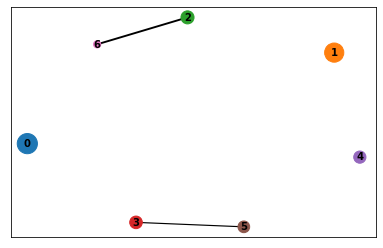

In [90]:
sc.pl.paga(adata, color=['SCT_snn_res.0.1'], threshold=0.1)

In [93]:
sc.tl.paga(adata, groups='type')

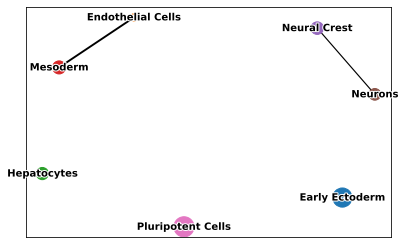

In [96]:
sc.pl.paga(adata, color=['type'], threshold=0.1, fontoutline=2)

In [97]:
sc.tl.draw_graph(adata, init_pos='paga')

In [7]:
fa_rev = adata.obsm['X_draw_graph_fa']

In [9]:
fa_rev

array([[ 68483.46567422,  27912.09272282],
       [-11081.27785594,  69776.97826096],
       [-52521.00418938, -45448.03863125],
       ...,
       [-61249.44506165, -48800.59142553],
       [ 52766.56395674,   7977.74013464],
       [ 70645.78480464,  29352.91435787]])

In [10]:
np.multiply(np.array([-1, 1]), fa_rev)

array([[-68483.46567422,  27912.09272282],
       [ 11081.27785594,  69776.97826096],
       [ 52521.00418938, -45448.03863125],
       ...,
       [ 61249.44506165, -48800.59142553],
       [-52766.56395674,   7977.74013464],
       [-70645.78480464,  29352.91435787]])

In [13]:
adata.obsm['X_draw_graph_fa'] = np.multiply(np.array([-1, 1]), adata.obsm['X_draw_graph_fa'])

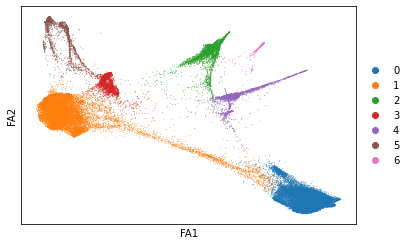

In [14]:
sc.pl.draw_graph(adata, color=['SCT_snn_res.0.1'], title="", save="_clustid_res0.1.png")

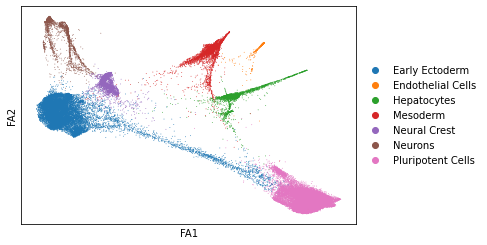

In [15]:
sc.pl.draw_graph(adata, color=['type'], title="", save="_type_res0.1.png")

In [101]:
adata.write_h5ad("../data/katie.graphed_res0.1.h5ad")

In [3]:
adata = sc.read_h5ad("../data/katie.graphed_res0.1.h5ad")

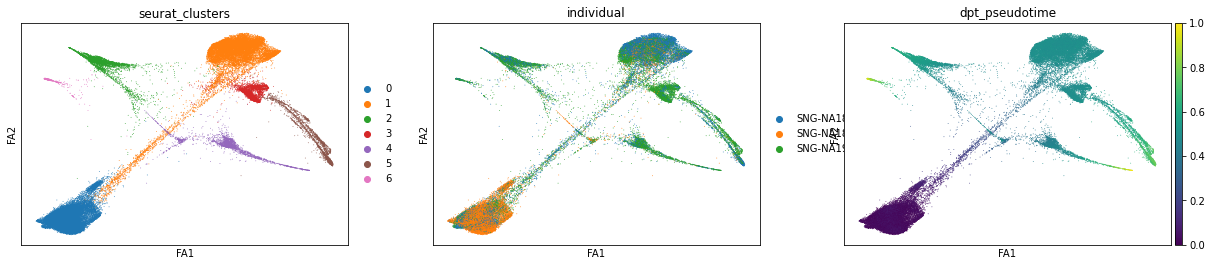

In [38]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['seurat_clusters']  == 0)[2]
sc.tl.dpt(adata)
sc.pl.draw_graph(adata, color=['seurat_clusters','individual','dpt_pseudotime'])

The raw data slots now contain log-normalized, SCTransform-corrected counts

In [39]:
adata = adata.raw.to_adata()

Subset to the cells from each lineage

In [40]:
endo = adata[adata.obs['seurat_clusters'].isin([0, 2, 6])]
neur = adata[adata.obs['seurat_clusters'].isin([0, 1, 3, 5])]
hep = adata[adata.obs['seurat_clusters'].isin([0, 4])]

For downstream analysis, we can subset to the top 5000 highly variable genes. After doing so, we're going to revert our logarithmized data back to SCTransform-corrected counts data

In [41]:
sc.pp.highly_variable_genes(endo, n_top_genes=5000)
endo = endo[:, endo.var.highly_variable]
endo.X = endo.X.expm1()

sc.pp.highly_variable_genes(hep, n_top_genes=5000)
hep = hep[:, hep.var.highly_variable]
hep.X = hep.X.expm1()

sc.pp.highly_variable_genes(neur, n_top_genes=5000)
neur = neur[:, neur.var.highly_variable]
neur.X = neur.X.expm1()

Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.


For downstream analysis, we would like pseudotime within each of these objects to go from 0 to 1; right now, some of them have a max pseudotime value less than 1

In [42]:
endo.obs['dpt_pseudotime'] = endo.obs['dpt_pseudotime']/max(endo.obs['dpt_pseudotime'])
neur.obs['dpt_pseudotime'] = neur.obs['dpt_pseudotime']/max(neur.obs['dpt_pseudotime'])
hep.obs['dpt_pseudotime'] = hep.obs['dpt_pseudotime']/max(hep.obs['dpt_pseudotime'])

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


In [43]:
endo.write_h5ad("../data/endo.dpt.h5ad")
neur.write_h5ad("../data/neur.dpt.h5ad")
hep.write_h5ad("../data/hep.dpt.h5ad")

## High resolution trajectory inference

In [74]:
adata = sc.read_h5ad("../data/katie.graphed_res1.h5ad")

In [ ]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=100, use_rep="X_harmony")
sc.tl.paga(adata, groups='SCT_snn_res.1')

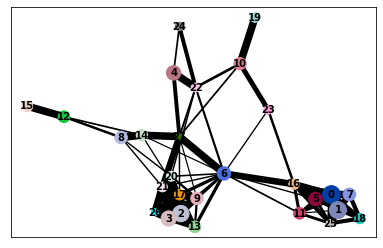

In [55]:
sc.pl.paga(adata, color=['SCT_snn_res.1'], threshold=.145, save="_res1.png")

In [ ]:
sc.tl.draw_graph(adata, init_pos='paga')

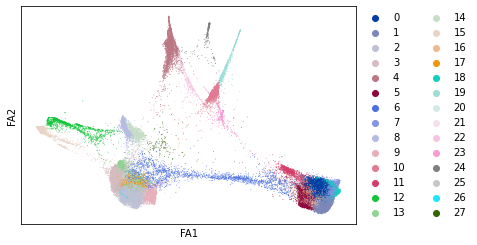

In [83]:
sc.pl.draw_graph(adata, color=['SCT_snn_res.1'], title="", save="_clustid_res1.png")

In [ ]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['SCT_snn_res.1']  == 1)[2]
sc.tl.dpt(adata)

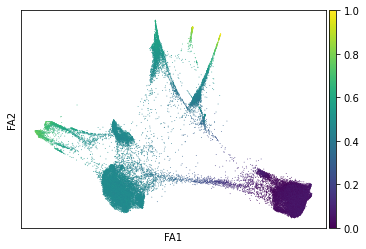

In [82]:
sc.pl.draw_graph(adata, color=['dpt_pseudotime'], title="", save="_dpt_res1.png")

In [57]:
adata.write_h5ad("../data/katie.graphed_res1.h5ad")

In [16]:
adata = sc.read_h5ad("../data/katie.graphed_res1.h5ad")

In [26]:
adata = adata.raw.to_adata()

In [27]:
endo = adata[adata.obs['SCT_snn_res.1'].isin([0, 1, 5, 7, 11, 16, 18, 25, 6, 22, 4, 24])]
neur = adata[adata.obs['SCT_snn_res.1'].isin([0, 1, 5, 7, 11, 16, 18, 25, 6, 2, 3, 9, 13, 
                                              17, 20, 21, 26, 27, 14, 8, 12, 15])]
hep = adata[adata.obs['SCT_snn_res.1'].isin([0, 1, 5, 7, 11, 16, 18, 25, 6, 22, 10, 19])]

In [28]:
sc.pp.highly_variable_genes(endo, n_top_genes=5000)
endo = endo[:, endo.var.highly_variable]
endo.X = endo.X.expm1()

sc.pp.highly_variable_genes(hep, n_top_genes=5000)
hep = hep[:, hep.var.highly_variable]
hep.X = hep.X.expm1()

sc.pp.highly_variable_genes(neur, n_top_genes=5000)
neur = neur[:, neur.var.highly_variable]
neur.X = neur.X.expm1()

Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.


In [29]:
endo.obs['dpt_pseudotime'] = endo.obs['dpt_pseudotime']/max(endo.obs['dpt_pseudotime'])
neur.obs['dpt_pseudotime'] = neur.obs['dpt_pseudotime']/max(neur.obs['dpt_pseudotime'])
hep.obs['dpt_pseudotime'] = hep.obs['dpt_pseudotime']/max(hep.obs['dpt_pseudotime'])

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


In [30]:
endo.write_h5ad("../data/endo.dpt.hires.h5ad")
neur.write_h5ad("../data/neur.dpt.hires.h5ad")
hep.write_h5ad("../data/hep.dpt.hires.h5ad")